In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv('USDINR=X.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2023-08-01  82.233299  82.345398  82.222000  82.233299  82.233299     0.0
1  2023-08-02  82.307297  82.809303  82.290001  82.307297  82.307297     0.0
2  2023-08-03  82.733299  82.855698  82.663002  82.733299  82.733299     0.0
3  2023-08-04  82.784302  82.889000  82.670502  82.784302  82.784302     0.0
4  2023-08-07  82.695297  82.824799  82.657097  82.695297  82.695297     0.0


In [2]:
# To Check if the dataset contains any missing values
print(data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [3]:
#if dataset has some missing values.Ten to remove them
data = data.dropna()

In [4]:
#To get the descriptive statistics of this dataset
print(data.describe())

             Open        High         Low       Close   Adj Close  Volume
count  263.000000  263.000000  263.000000  263.000000  263.000000   263.0
mean    83.221607   83.321542   83.088995   83.221614   83.221614     0.0
std      0.301587    0.308738    0.355121    0.301598    0.301598     0.0
min     82.233299   82.345398   81.026001   82.233299   82.233299     0.0
25%     83.042747   83.145847   82.917499   83.042747   83.042747     0.0
50%     83.247299   83.330200   83.141998   83.247299   83.247299     0.0
75%     83.411198   83.502598   83.302998   83.411198   83.411198     0.0
max     85.194000   85.185997   83.698997   85.194000   85.194000     0.0


In [5]:
figure = px.line(data, x='Date' , y='Close', title='USD-INR Conversion rate')
figure.show()

In [6]:
#Adding Year and Month column by extarcting month and Year from Dates in Date Column
data['Date'] = pd.to_datetime(data['Date'] ,  format = '%Y-%m-%d')
data['Year']= data['Date'].dt.year
data['Month']= data['Date'].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2023-08-01  82.233299  82.345398  82.222000  82.233299  82.233299     0.0   
1 2023-08-02  82.307297  82.809303  82.290001  82.307297  82.307297     0.0   
2 2023-08-03  82.733299  82.855698  82.663002  82.733299  82.733299     0.0   
3 2023-08-04  82.784302  82.889000  82.670502  82.784302  82.784302     0.0   
4 2023-08-07  82.695297  82.824799  82.657097  82.695297  82.695297     0.0   

   Year  Month  
0  2023      8  
1  2023      8  
2  2023      8  
3  2023      8  
4  2023      8  


In [7]:
import plotly.graph_objs as go
import plotly.io as pio

#Calculate Yearly growth
growth = data.groupby('Year').agg({'Close'  : lambda x: (x.iloc[-1]-x.iloc[0])/ x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title='Yearly Growth of USD-INR Consersion Rate',
                  xaxis_title='Year',
                  yaxis_title='Growth(%)',
                  width=900,
                  height=600)

pio.show(fig)

In [8]:
#Calculate monthly Growth
data['Growth']= data.groupby(['Year','Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0])/ x.iloc[0]*100)

#Group data by Month and Calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

<Figure size 640x480 with 0 Axes>

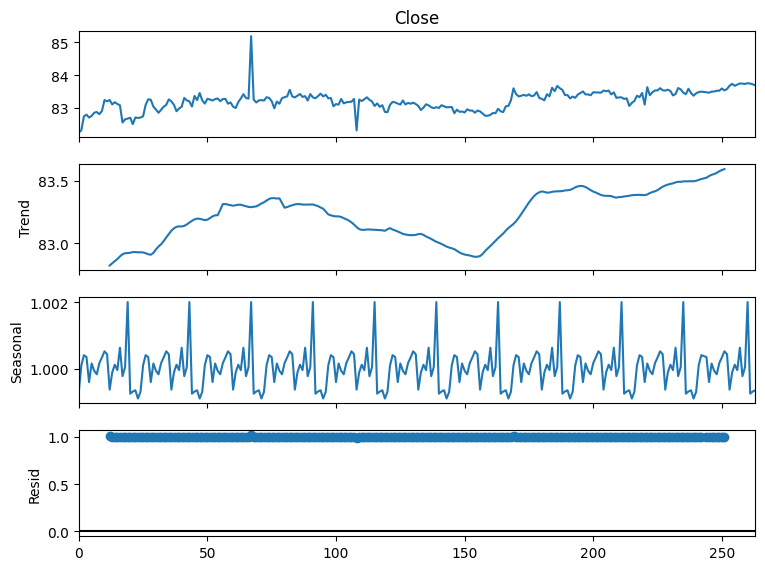

In [9]:
#Forecasting Exchange Rates Using Time Series Forecasting

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], model='multiplicative',period=24)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8,6)
fig.show()

we can see that there’s a seasonal pattern in this data. So SARIMA will be the most appropriate algorithm for this data. Before using SARIMA, we need to find p,d, and q values

In [10]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


In [11]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(1, 1, 2)


In [12]:
p, d, q = 1, 1, 2

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q),
                seasonal_order=(p, d, q, 52))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  263
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                   5.685
Date:                            Thu, 01 Aug 2024   AIC                              2.631
Time:                                    20:43:27   BIC                             26.061
Sample:                                         0   HQIC                            12.103
                                            - 263                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6998      0.352      1.990      0.047       0.010       1.389
ma.L1         -1.3036      0.355   

In [14]:
predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

263    83.691371
264    83.530155
265    83.703887
266    83.633019
267    83.702019
         ...    
319    83.907255
320    83.886356
321    83.915958
322    84.027675
323    84.037214
Name: predicted_mean, Length: 61, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [15]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)